# Efficient-CapsNet Model Train

In this notebook we provide a simple interface to train Efficient-CapsNet on the three dataset discussed in "Efficient-CapsNet: Capsule Network with Self-Attention Routing":

- MNIST (MNIST)
- smallNORB (SMALLNORB)
- Multi-MNIST (MULTIMNIST)

The hyperparameters have been only slightly investigated. So, there's a lot of room for improvements. Good luck!

**NB**: remember to modify the "config.json" file with the appropriate parameters.

In [75]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages, plotHistory
from models import EfficientCapsNet
import matplotlib.pyplot as plt
import numpy as np

In [77]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [78]:
# some parameters
model_name = 'MNIST'
# model_name = 'MHD'

# 1.0 Import the Dataset

In [79]:
#load mhd data
dataset = Dataset(model_name, config_path='config.json')

(378, 128, 128)
(378,)
(50, 128, 128)
(50,)
[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[INFO] Dataset loaded!


In [80]:
dataset.X_test.shape

(50, 128, 128, 1)

## 1.1 Visualize imported dataset

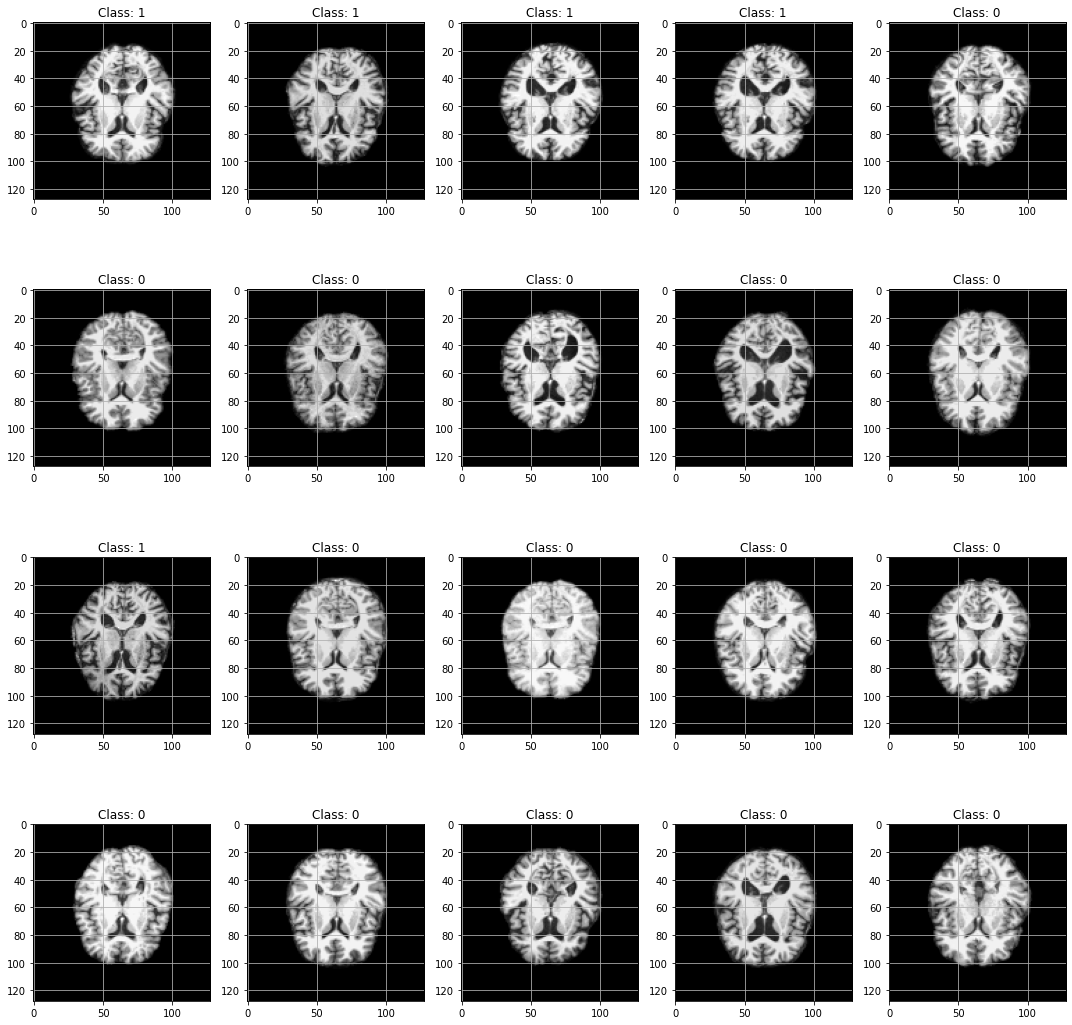

In [81]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [82]:
model_train = EfficientCapsNet(model_name, mode='train', verbose=True)

[128, 128, 1]
Model: "Efficient_CapsNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 124, 124, 32)      832       
_________________________________________________________________
batch_normalization_28 (Batc (None, 124, 124, 32)      128       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 122, 122, 64)      18496     
_________________________________________________________________
batch_normalization_29 (Batc (None, 122, 122, 64)      256       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 120, 120, 64)      36928     
_________________________________________________________________
batch_normalization_30 (Batc (None,

# 3.0 Train the Model

In [83]:
dataset_train, dataset_val = dataset.get_tf_data()

In [84]:
history = model_train.train(dataset, initial_epoch=0)

------------------------------MNIST train------------------------------
Epoch 1/150
24/24 [==============================] - 7s 223ms/step - loss: 0.4004 - Efficient_CapsNet_loss: 0.3182 - Generator_loss: 0.2097 - Efficient_CapsNet_accuracy: 0.6772 - val_loss: 0.7390 - val_Efficient_CapsNet_loss: 0.6485 - val_Generator_loss: 0.2307 - val_Efficient_CapsNet_accuracy: 0.7600

Epoch 00001: val_Efficient_CapsNet_accuracy improved from -inf to 0.76000, saving model to bin\efficient_capsnetMNIST_new_train.h5
Epoch 2/150
24/24 [==============================] - 2s 97ms/step - loss: 0.2924 - Efficient_CapsNet_loss: 0.2729 - Generator_loss: 0.0498 - Efficient_CapsNet_accuracy: 0.6190 - val_loss: 0.7627 - val_Efficient_CapsNet_loss: 0.6989 - val_Generator_loss: 0.1626 - val_Efficient_CapsNet_accuracy: 0.7600

Epoch 00002: val_Efficient_CapsNet_accuracy did not improve from 0.76000
Epoch 3/150
24/24 [==============================] - 2s 98ms/step - loss: 0.2270 - Efficient_CapsNet_loss: 0.2254 - G

Epoch 22/150
24/24 [==============================] - 2s 100ms/step - loss: 0.1722 - Efficient_CapsNet_loss: 0.1722 - Generator_loss: 1.1888e-04 - Efficient_CapsNet_accuracy: 0.7540 - val_loss: 0.4312 - val_Efficient_CapsNet_loss: 0.4296 - val_Generator_loss: 0.0041 - val_Efficient_CapsNet_accuracy: 0.7600

Epoch 00022: val_Efficient_CapsNet_accuracy did not improve from 0.76000
Epoch 23/150
24/24 [==============================] - 2s 99ms/step - loss: 0.1677 - Efficient_CapsNet_loss: 0.1677 - Generator_loss: 9.2310e-05 - Efficient_CapsNet_accuracy: 0.7593 - val_loss: 0.3810 - val_Efficient_CapsNet_loss: 0.3799 - val_Generator_loss: 0.0030 - val_Efficient_CapsNet_accuracy: 0.7600

Epoch 00023: val_Efficient_CapsNet_accuracy did not improve from 0.76000
Epoch 24/150
24/24 [==============================] - 2s 97ms/step - loss: 0.1759 - Efficient_CapsNet_loss: 0.1759 - Generator_loss: 1.2752e-04 - Efficient_CapsNet_accuracy: 0.7540 - val_loss: 0.2851 - val_Efficient_CapsNet_loss: 0.2845 

24/24 [==============================] - 2s 96ms/step - loss: 0.1615 - Efficient_CapsNet_loss: 0.1615 - Generator_loss: 4.8726e-05 - Efficient_CapsNet_accuracy: 0.7593 - val_loss: 0.1530 - val_Efficient_CapsNet_loss: 0.1530 - val_Generator_loss: 3.9263e-05 - val_Efficient_CapsNet_accuracy: 0.7600

Epoch 00043: val_Efficient_CapsNet_accuracy did not improve from 0.76000
Epoch 44/150
24/24 [==============================] - 2s 97ms/step - loss: 0.1640 - Efficient_CapsNet_loss: 0.1640 - Generator_loss: 3.3468e-05 - Efficient_CapsNet_accuracy: 0.7593 - val_loss: 0.1616 - val_Efficient_CapsNet_loss: 0.1616 - val_Generator_loss: 1.5183e-05 - val_Efficient_CapsNet_accuracy: 0.7600

Epoch 00044: val_Efficient_CapsNet_accuracy did not improve from 0.76000
Epoch 45/150
24/24 [==============================] - 2s 96ms/step - loss: 0.1629 - Efficient_CapsNet_loss: 0.1629 - Generator_loss: 3.7593e-05 - Efficient_CapsNet_accuracy: 0.7593 - val_loss: 0.1613 - val_Efficient_CapsNet_loss: 0.1613 - val_

24/24 [==============================] - 2s 96ms/step - loss: 0.1555 - Efficient_CapsNet_loss: 0.1554 - Generator_loss: 3.0788e-05 - Efficient_CapsNet_accuracy: 0.7619 - val_loss: 0.1615 - val_Efficient_CapsNet_loss: 0.1615 - val_Generator_loss: 4.1991e-05 - val_Efficient_CapsNet_accuracy: 0.7600

Epoch 00064: val_Efficient_CapsNet_accuracy did not improve from 0.76000
Epoch 65/150
24/24 [==============================] - 2s 95ms/step - loss: 0.1533 - Efficient_CapsNet_loss: 0.1532 - Generator_loss: 2.2672e-05 - Efficient_CapsNet_accuracy: 0.7540 - val_loss: 0.1626 - val_Efficient_CapsNet_loss: 0.1626 - val_Generator_loss: 1.5940e-05 - val_Efficient_CapsNet_accuracy: 0.7600

Epoch 00065: val_Efficient_CapsNet_accuracy did not improve from 0.76000
Epoch 66/150
24/24 [==============================] - 2s 96ms/step - loss: 0.1521 - Efficient_CapsNet_loss: 0.1521 - Generator_loss: 2.2682e-05 - Efficient_CapsNet_accuracy: 0.7593 - val_loss: 0.1572 - val_Efficient_CapsNet_loss: 0.1572 - val_

24/24 [==============================] - 2s 96ms/step - loss: 0.1486 - Efficient_CapsNet_loss: 0.1486 - Generator_loss: 1.4075e-05 - Efficient_CapsNet_accuracy: 0.7593 - val_loss: 0.1670 - val_Efficient_CapsNet_loss: 0.1670 - val_Generator_loss: 1.9355e-05 - val_Efficient_CapsNet_accuracy: 0.7600

Epoch 00085: val_Efficient_CapsNet_accuracy did not improve from 0.76000
Epoch 86/150
24/24 [==============================] - 2s 96ms/step - loss: 0.1511 - Efficient_CapsNet_loss: 0.1511 - Generator_loss: 1.5979e-05 - Efficient_CapsNet_accuracy: 0.7672 - val_loss: 0.1694 - val_Efficient_CapsNet_loss: 0.1694 - val_Generator_loss: 8.6241e-05 - val_Efficient_CapsNet_accuracy: 0.7600

Epoch 00086: val_Efficient_CapsNet_accuracy did not improve from 0.76000
Epoch 87/150
24/24 [==============================] - 2s 97ms/step - loss: 0.1439 - Efficient_CapsNet_loss: 0.1439 - Generator_loss: 1.4521e-05 - Efficient_CapsNet_accuracy: 0.7619 - val_loss: 0.1666 - val_Efficient_CapsNet_loss: 0.1666 - val_

24/24 [==============================] - 2s 96ms/step - loss: 0.1423 - Efficient_CapsNet_loss: 0.1423 - Generator_loss: 1.0262e-05 - Efficient_CapsNet_accuracy: 0.7646 - val_loss: 0.1700 - val_Efficient_CapsNet_loss: 0.1700 - val_Generator_loss: 3.3222e-05 - val_Efficient_CapsNet_accuracy: 0.8000

Epoch 00106: val_Efficient_CapsNet_accuracy did not improve from 0.80000
Epoch 107/150
24/24 [==============================] - 2s 96ms/step - loss: 0.1438 - Efficient_CapsNet_loss: 0.1437 - Generator_loss: 7.9146e-06 - Efficient_CapsNet_accuracy: 0.7698 - val_loss: 0.1646 - val_Efficient_CapsNet_loss: 0.1646 - val_Generator_loss: 3.8488e-05 - val_Efficient_CapsNet_accuracy: 0.7600

Epoch 00107: val_Efficient_CapsNet_accuracy did not improve from 0.80000
Epoch 108/150
24/24 [==============================] - 2s 97ms/step - loss: 0.1463 - Efficient_CapsNet_loss: 0.1463 - Generator_loss: 1.3844e-05 - Efficient_CapsNet_accuracy: 0.7672 - val_loss: 0.1613 - val_Efficient_CapsNet_loss: 0.1613 - va

24/24 [==============================] - 2s 98ms/step - loss: 0.1320 - Efficient_CapsNet_loss: 0.1320 - Generator_loss: 5.2714e-06 - Efficient_CapsNet_accuracy: 0.7937 - val_loss: 0.1669 - val_Efficient_CapsNet_loss: 0.1669 - val_Generator_loss: 2.6065e-05 - val_Efficient_CapsNet_accuracy: 0.7600

Epoch 00127: val_Efficient_CapsNet_accuracy did not improve from 0.80000
Epoch 128/150
24/24 [==============================] - 2s 97ms/step - loss: 0.1347 - Efficient_CapsNet_loss: 0.1347 - Generator_loss: 6.8958e-06 - Efficient_CapsNet_accuracy: 0.7698 - val_loss: 0.1716 - val_Efficient_CapsNet_loss: 0.1715 - val_Generator_loss: 1.7360e-05 - val_Efficient_CapsNet_accuracy: 0.7600

Epoch 00128: val_Efficient_CapsNet_accuracy did not improve from 0.80000
Epoch 129/150
24/24 [==============================] - 2s 101ms/step - loss: 0.1386 - Efficient_CapsNet_loss: 0.1386 - Generator_loss: 7.5875e-06 - Efficient_CapsNet_accuracy: 0.7963 - val_loss: 0.1730 - val_Efficient_CapsNet_loss: 0.1730 - v

24/24 [==============================] - 2s 100ms/step - loss: 0.1315 - Efficient_CapsNet_loss: 0.1315 - Generator_loss: 4.3378e-06 - Efficient_CapsNet_accuracy: 0.7937 - val_loss: 0.1603 - val_Efficient_CapsNet_loss: 0.1603 - val_Generator_loss: 7.3937e-06 - val_Efficient_CapsNet_accuracy: 0.7400

Epoch 00148: val_Efficient_CapsNet_accuracy did not improve from 0.80000
Epoch 149/150
24/24 [==============================] - 2s 97ms/step - loss: 0.1266 - Efficient_CapsNet_loss: 0.1266 - Generator_loss: 4.5571e-06 - Efficient_CapsNet_accuracy: 0.8069 - val_loss: 0.1698 - val_Efficient_CapsNet_loss: 0.1698 - val_Generator_loss: 1.0354e-05 - val_Efficient_CapsNet_accuracy: 0.7800

Epoch 00149: val_Efficient_CapsNet_accuracy did not improve from 0.80000
Epoch 150/150
24/24 [==============================] - 2s 96ms/step - loss: 0.1253 - Efficient_CapsNet_loss: 0.1253 - Generator_loss: 5.6626e-06 - Efficient_CapsNet_accuracy: 0.7989 - val_loss: 0.1674 - val_Efficient_CapsNet_loss: 0.1674 - v

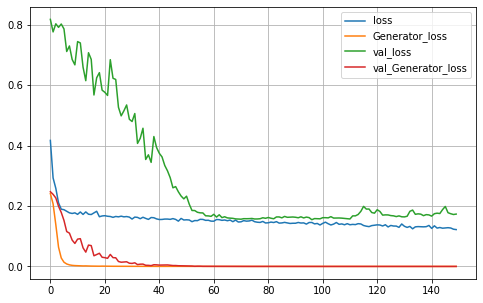

In [71]:
plotHistory(history)

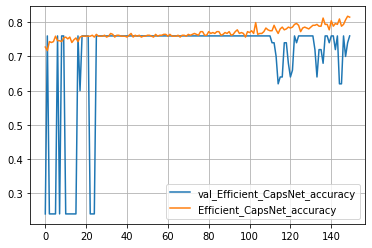

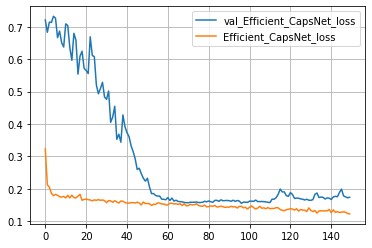

In [72]:
def plot_history(history):
    plt.plot(history.history['val_Efficient_CapsNet_accuracy'])
    plt.plot(history.history['Efficient_CapsNet_accuracy'])

    plt.legend(['val_Efficient_CapsNet_accuracy','Efficient_CapsNet_accuracy'])
    plt.grid(True)
    plt.show()


    plt.plot(history.history['val_Efficient_CapsNet_loss'])
    plt.plot(history.history['Efficient_CapsNet_loss'])

    plt.legend(['val_Efficient_CapsNet_loss','Efficient_CapsNet_loss'])
    plt.grid(True)
    plt.show()
plot_history(history)

In [73]:
history.history

{'loss': [0.4174109995365143,
  0.29312294721603394,
  0.25866806507110596,
  0.21060563623905182,
  0.18962997198104858,
  0.18795984983444214,
  0.18263250589370728,
  0.1775319129228592,
  0.17549462616443634,
  0.17749068140983582,
  0.17258253693580627,
  0.18040436506271362,
  0.1722499281167984,
  0.18064777553081512,
  0.17294038832187653,
  0.17196562886238098,
  0.1772652119398117,
  0.18273042142391205,
  0.1646367311477661,
  0.16723193228244781,
  0.16810233891010284,
  0.16625277698040009,
  0.16543292999267578,
  0.1626562923192978,
  0.1655484139919281,
  0.1642584353685379,
  0.16649013757705688,
  0.1643173098564148,
  0.16528122127056122,
  0.16339366137981415,
  0.15698641538619995,
  0.16349774599075317,
  0.16247566044330597,
  0.15809044241905212,
  0.16294363141059875,
  0.15910618007183075,
  0.15582618117332458,
  0.16202406585216522,
  0.16132259368896484,
  0.15747424960136414,
  0.15541605651378632,
  0.15570946037769318,
  0.15690740942955017,
  0.15694223

In [74]:
def plot_acc(history):
# plot the training accuracy
    plt.plot(history.history["acc"])
    plt.plot(history.history["val_acc"])
    plt.title("Training Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Training", "Validation"], loc="upper left")
    plt.show()
    
    # plot the training loss
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Training Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Training", "Validation"], loc="upper left")
    #plt.savefig(where+'_loss.png')
    plt.show()
#plot_acc(history)